# Donald Trump Stock Portfolio 

During Trump Presidental, he did not support climate change. Stocks relate to climate change it did not go up much or it went down. Pesidental can affect the stock market or particular stocks. 


https://en.wikipedia.org/wiki/Political_positions_of_Donald_Trump

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['GE','JCI','ALSMY','VWDRY','OC']
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  5 of 5 downloaded


,ALSMY,GE,JCI,OC,VWDRY
Date,,,,,
2017-01-03,2.326459,28.130621,39.377151,50.005348,20.905153
2017-01-04,2.317937,28.139500,39.432838,49.899479,20.772120
2017-01-05,2.326459,27.979715,38.922409,50.525032,21.085697
2017-01-06,2.326459,28.059608,39.711254,50.178577,21.161716
2017-01-09,2.326459,27.926458,39.534920,49.957233,21.209229


In [3]:
df.tail()

,ALSMY,GE,JCI,OC,VWDRY
Date,,,,,
2018-12-24,3.468085,6.633243,27.953753,40.499290,24.626158
2018-12-26,3.476755,7.083766,29.159754,42.258850,24.902634
2018-12-27,3.442075,6.968739,29.130339,42.946941,24.971754
2018-12-28,3.433404,7.198793,29.032291,42.937115,24.695276
2018-12-31,3.494096,7.256308,29.071510,43.232006,24.863138


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

2 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
ALSMY: 20000.0
GE: 20000.0
JCI: 20000.0
OC: 20000.0
VWDRY: 20000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ALSMY: 8596
GE: 710
JCI: 507
OC: 399
VWDRY: 956


In [9]:
print('Beginning Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ALSMY: $19998.24
GE: $19972.74
JCI: $19964.22
OC: $19952.13
VWDRY: $19985.33


In [30]:
print('Current Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ALSMY: $30035.25
GE: $5151.98
JCI: $14739.26
OC: $17249.57
VWDRY: $23769.16


In [31]:
result = []
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $90945.22


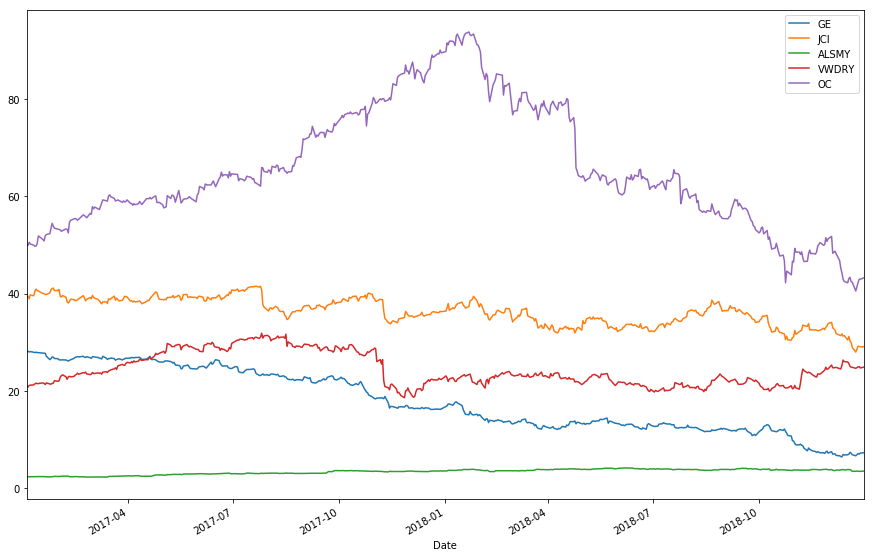

In [12]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [13]:
df.min()

ALSMY     2.258285
GE        6.423105
JCI      27.953753
OC       40.499290
VWDRY    18.562418
dtype: float64

In [14]:
for s in symbols:
    print(s + ":",  df[s].max())

GE: 28.1395
JCI: 41.504387
ALSMY: 4.158313
VWDRY: 31.836481
OC: 93.779671


In [15]:
# Creating a Return Data Frame for all individual banks stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,GE Return,JCI Return,ALSMY Return,VWDRY Return,OC Return
Date,,,,,
2017-01-04,0.000316,0.001414,-0.003663,-0.006364,-0.002117
2017-01-05,-0.005678,-0.012944,0.003677,0.015096,0.012536
2017-01-06,0.002855,0.020267,0.000000,0.003605,-0.006857
2017-01-09,-0.004745,-0.004440,0.000000,0.002245,-0.004411


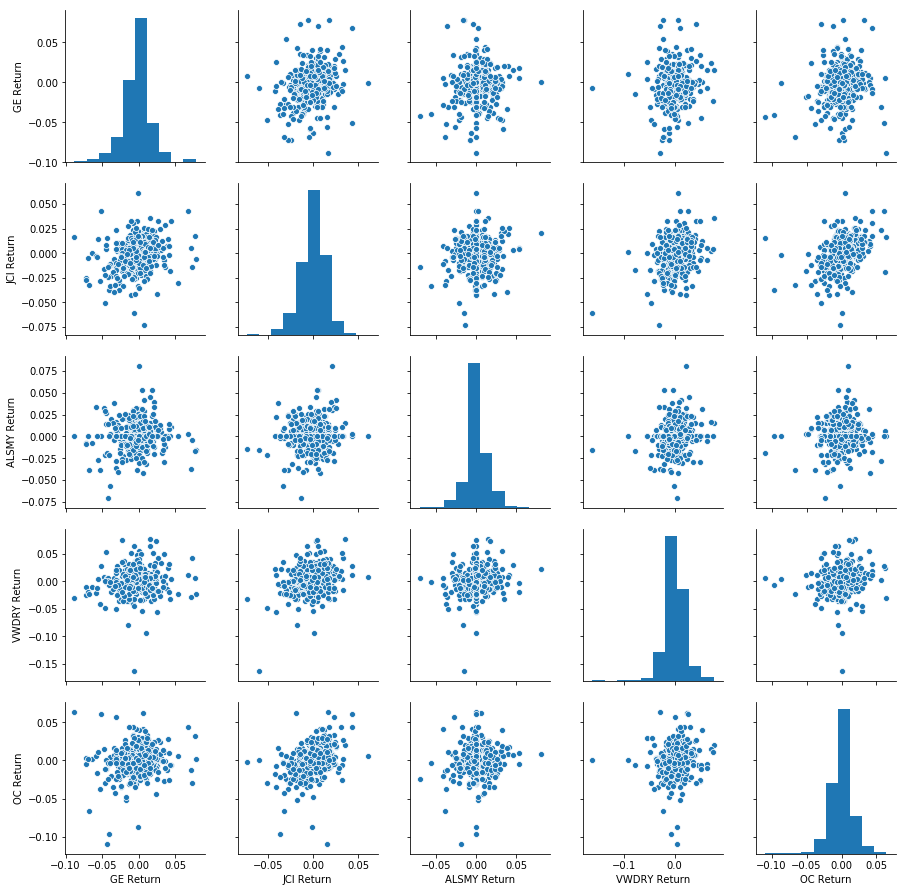

In [16]:
sns.pairplot(returns[1:] )

In [17]:
# dates each bank stock had the best and worst single day returns. 
print(returns.idxmax())

GE Return      2018-06-26
JCI Return     2018-05-01
ALSMY Return   2017-04-24
VWDRY Return   2017-11-28
OC Return      2018-10-30
dtype: datetime64[ns]


In [18]:
# dates each bank stock had the best and worst single day returns. 
print(returns.idxmin())

GE Return      2018-10-30
JCI Return     2017-07-27
ALSMY Return   2018-10-11
VWDRY Return   2017-11-09
OC Return      2018-04-25
dtype: datetime64[ns]


In [19]:
returns.corr()

,GE Return,JCI Return,ALSMY Return,VWDRY Return,OC Return
GE Return,1.000000,0.248699,0.076865,0.080060,0.156558
JCI Return,0.248699,1.000000,0.093351,0.260718,0.388753
ALSMY Return,0.076865,0.093351,1.000000,0.148658,0.093428
VWDRY Return,0.080060,0.260718,0.148658,1.000000,0.108735
OC Return,0.156558,0.388753,0.093428,0.108735,1.000000


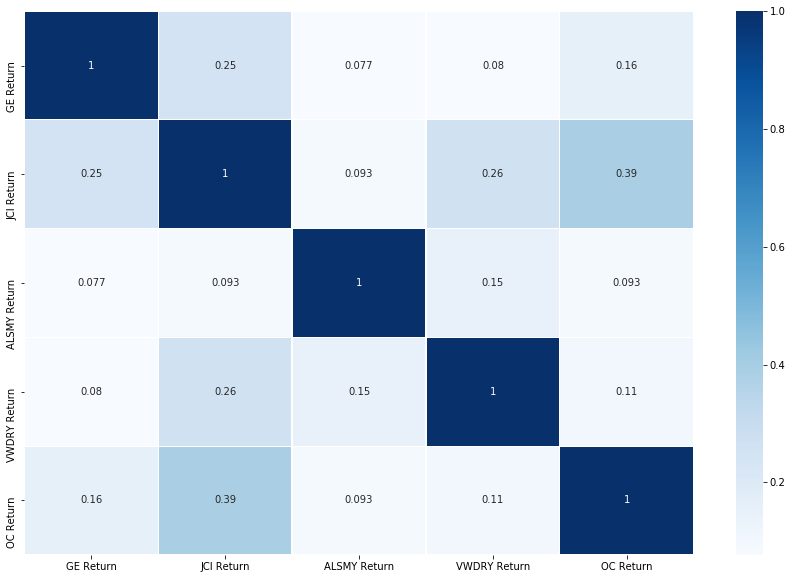

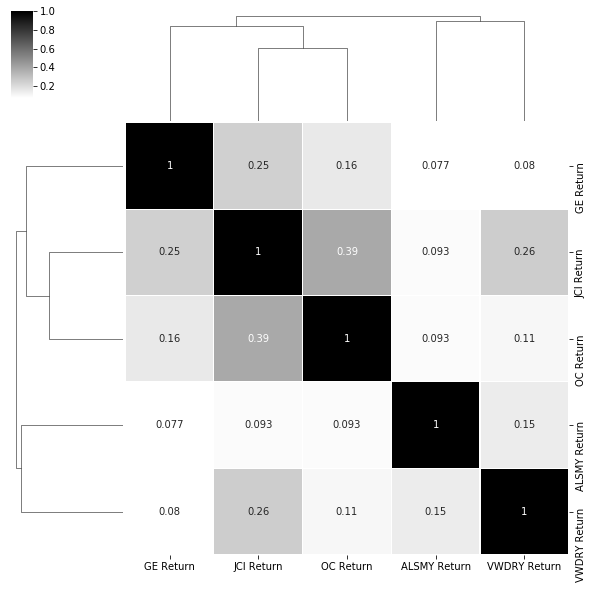

In [20]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

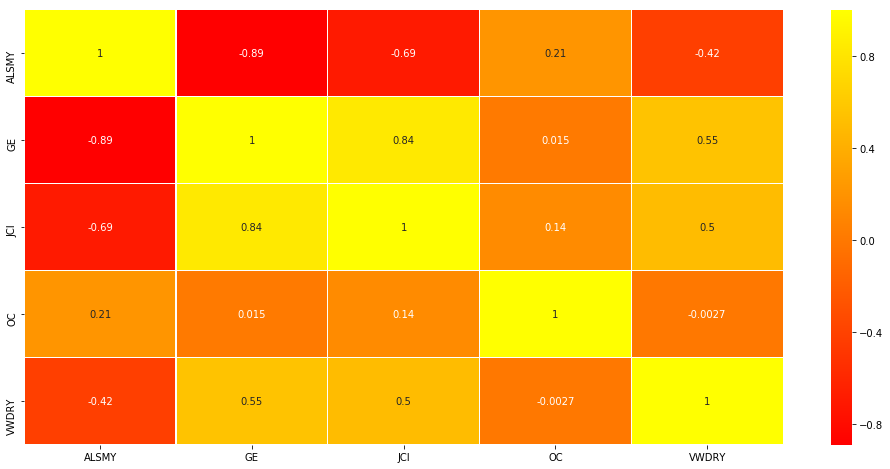

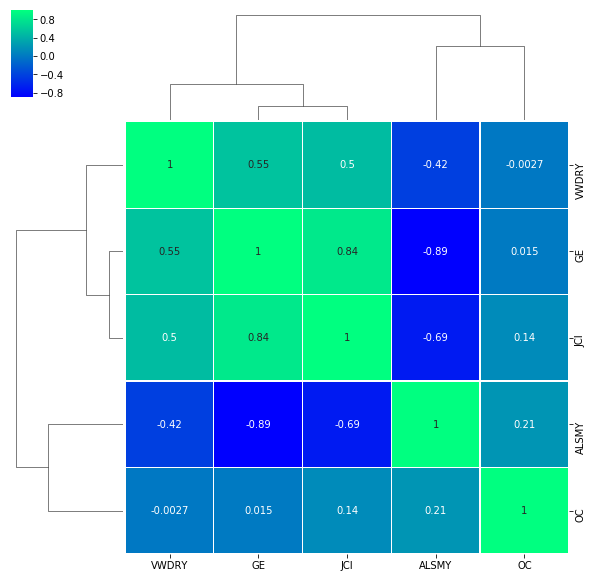

In [21]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)